In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  

# Check for missing values
print(df.isnull().sum())

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns (as they are irrelevant or have too many missing values)
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Convert categorical variables ('Sex' and 'Embarked') to numerical values using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Check the cleaned data
print(df.head())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2
Model Accuracy: 82.68%


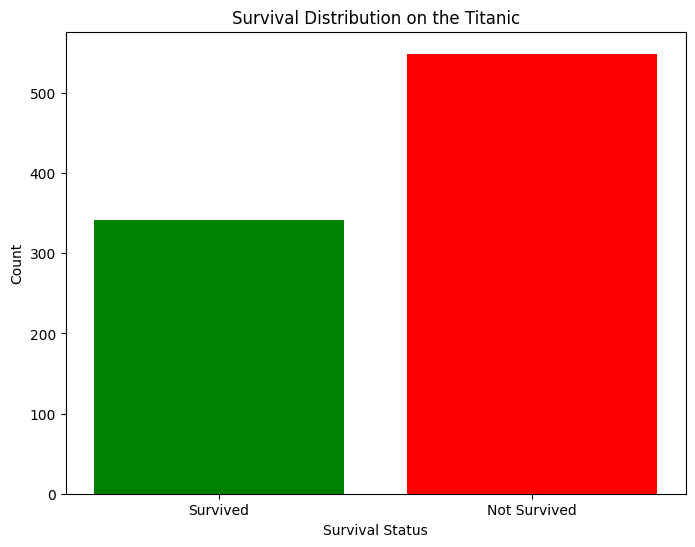

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' and 'Name' and 'Ticket' columns (as they are irrelevant or have too many missing values)
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Convert categorical variables ('Sex' and 'Embarked') to numerical values using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Check the cleaned data
print(df.head())

# Define features and target variable
X = df.drop(columns=['Survived'])  # Features (all columns except 'Survived')
y = df['Survived']  # Target (Survived column)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset (assuming it's cleaned and saved as 'cleaned_titanic.csv')
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  # Replace with the correct path to your dataset

# Get the number of survivors (1's) and non-survivors (0's)
survived_count = df['Survived'].sum()
not_survived_count = len(df) - survived_count

# Plotting the results
labels = ['Survived', 'Not Survived']
counts = [survived_count, not_survived_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Survival Distribution on the Titanic')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()


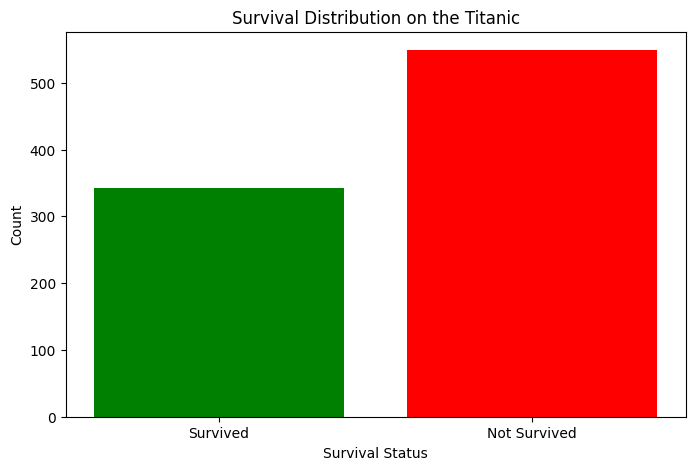

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset (assuming it's cleaned and saved as 'cleaned_titanic.csv')
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  # Replace with the correct path to your dataset

# Get the number of survivors (1's) and non-survivors (0's)
survived_count = df['Survived'].sum()
not_survived_count = len(df) - survived_count

# Plotting the results
labels = ['Survived', 'Not Survived']
counts = [survived_count, not_survived_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Survival Distribution on the Titanic')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()


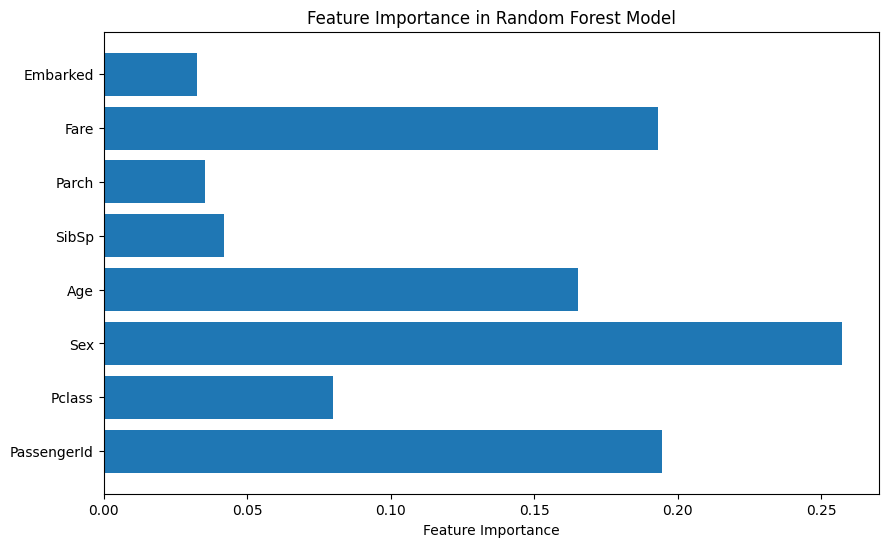

In [5]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns (as they are irrelevant or have too many missing values)
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Ensure there is no leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Check if 'Embarked' exists in the DataFrame
if 'Embarked' in df.columns:
    # One-Hot Encoding for 'Embarked'
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Convert categorical variables ('Sex') to numerical values using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Check the cleaned data
print(df.head())



Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500       False        True
1         1       1    0  38.0      1      0  71.2833       False       False
2         1       3    0  26.0      0      0   7.9250       False        True
3         1       1    0  35.0      1      0  53.1000       False        True
4         0       3    1  35.0      0      0   8.0500       False        True


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns (as they are irrelevant or have too many missing values)
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Ensure there is no leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Check if 'Embarked' exists in the DataFrame
if 'Embarked' in df.columns:
    # One-Hot Encoding for 'Embarked'
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Convert categorical variables ('Sex') to numerical values using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Define features and target variable
X = df.drop(columns=['Survived'])  # Features (all columns except 'Survived')
y = df['Survived']  # Target (Survived column)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Model Accuracy: 81.01%


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Convert categorical variables ('Sex' and 'Embarked') to numerical values using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Define features and target variable
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to fit into a CNN (since CNN works on 3D input)
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
model = Sequential()

# Add 1D Convolutional Layer
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))

# Flatten the output from the convolution layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5895 - loss: 0.7536
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.6249
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6655 - loss: 0.6165
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7027 - loss: 0.5877
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.5947 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6980 - loss: 0.5707 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6682 - loss: 0.6478
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 0.5692 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7322 - loss: 0.5438 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7480 - loss: 0.5497 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Accuracy: 75.98%


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5592 - loss: 0.8270 - val_accuracy: 0.7263 - val_loss: 0.5719
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6791 - loss: 0.6141 - val_accuracy: 0.7039 - val_loss: 0.5687
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6822 - loss: 0.5984 - val_accuracy: 0.7318 - val_loss: 0.5722
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6799 - loss: 0.6161 - val_accuracy: 0.7207 - val_loss: 0.5523
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6893 - loss: 0.5842 - val_accuracy: 0.5866 - val_loss: 0.6133
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6623 - loss: 0.6197 - val_accuracy: 0.7318 - val_loss: 0.5374
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6489 - loss: 0.6047 - val_accuracy: 0.6760 - val_loss: 0.5727
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.6100 - val_accuracy: 0.7486 - val_loss: 0.5360
Ep

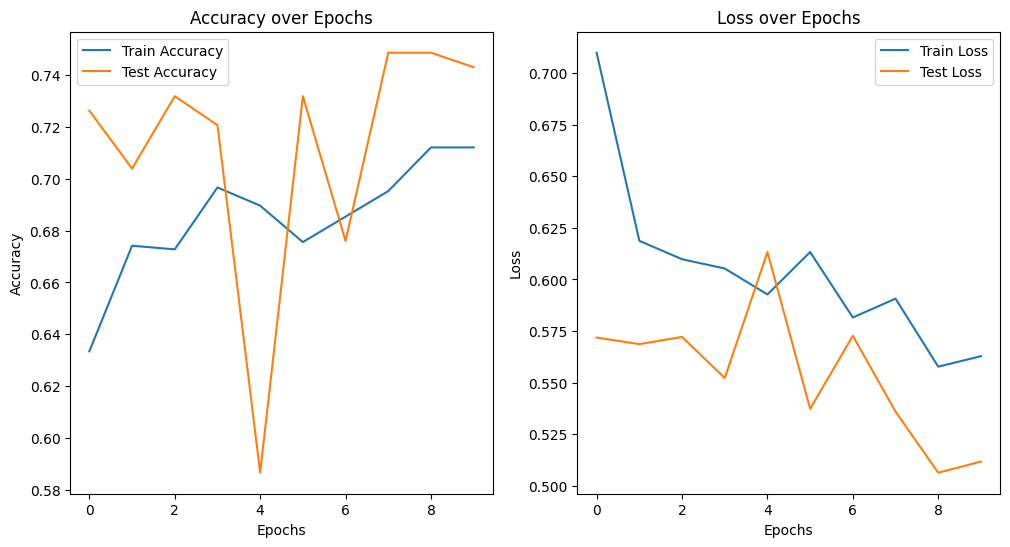

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Convert categorical variables ('Sex' and 'Embarked') to numerical values using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Define features and target variable
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to fit into a CNN (since CNN works on 3D input)
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
model = Sequential()

# Add 1D Convolutional Layer
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))

# Flatten the output from the convolution layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


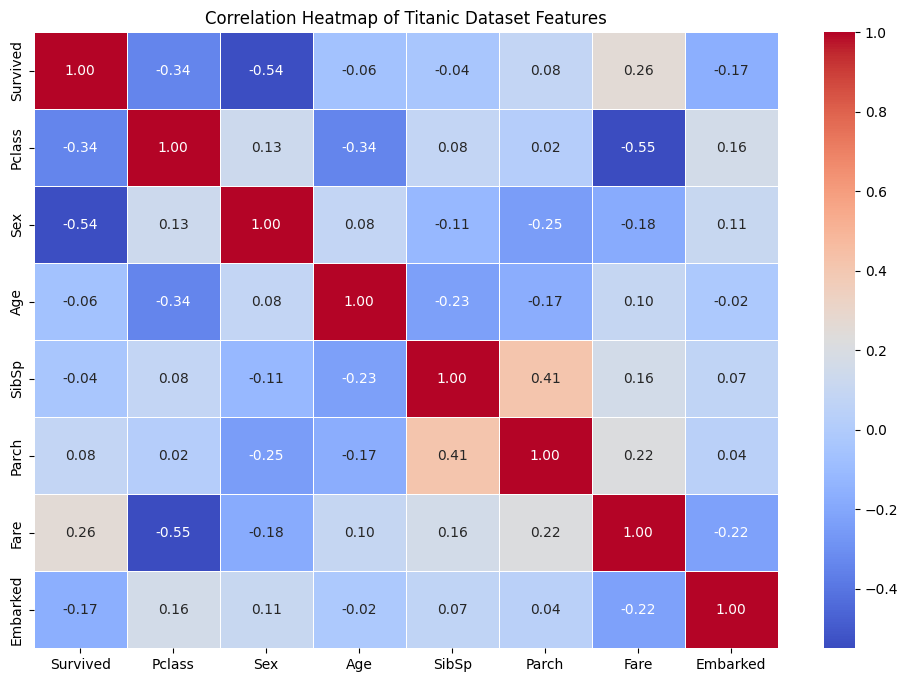

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')  

# Handle missing 'Age' by filling with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing 'Embarked' by filling with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Convert categorical variables ('Sex' and 'Embarked') to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and show the plot
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()
